In [3]:
import pandas as pd
import numpy as np

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)

#### Chi2 - simple example

In [3]:
# required imports
from scipy.stats import chi2_contingency

In [4]:
# we create contingency table same as above
table = [[20,  30, 15], 
         [20,  15,  30]]

In [5]:
# Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
stat, p, dof, expected = chi2_contingency(table)

In [6]:
# select significance value
alpha = 0.05

# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.050, p=0.007
Variables are associated (reject H0)


#### Example on census data

Attribute Information:

Listing of attributes: 

>50K, <=50K. 

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- __sex__: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- __hours-per-week__: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### Study the relationship between 'sex' and 'hours-per-week' worked variables

- First let's get the assumptions :

> - There must be different participants in each group with no participant being in more than one group. In our case, each individual can only have one 'sex' and can not be in multiple workhour categories.
> - Random samples from the population. In our case, the census is a good representation of the population.

In [6]:
location = r"D:\MYLEARN\datasets\census.csv"

In [7]:
cols = ['age', 'workclass', 'fnlwg', 'education', 'education-num', 
        'marital-status','occupation','relationship', 'race','sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [8]:
data = pd.read_csv(location, names=cols)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\MYLEARN\\datasets\\census.csv'

In [5]:
data.head(3)

NameError: name 'data' is not defined

In [3]:
# Create a column for work hour categories.
def process_hours(df):
    cut_points  = [ 0,    9,     19,     29,     39,     49, 1000]
    
    label_names = ["0-9","10-19","20-29","30-39","40-49","50+"]
    
    df["hours_per_week_categories"] = pd.cut(df["hours-per-week"],
                                             cut_points,
                                             labels=label_names)
    return df

In [4]:
data = process_hours(data)
data.sample(5)

NameError: name 'data' is not defined

In [13]:
workhour_by_sex = data[['sex', 'hours_per_week_categories']]
workhour_by_sex.head()

,sex,hours_per_week_categories
0,Male,40-49
1,Male,10-19
2,Male,40-49
3,Male,40-49
4,Female,40-49


In [14]:
workhour_by_sex['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [15]:
workhour_by_sex['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [27]:
workhour_by_sex.dtypes

sex                            object
hours_per_week_categories    category
dtype: object

#### The Null and Alternate Hypotheses
we are interested in knowing if there is a relationship between 'sex' and 'hours_per_week_categories'. 

In order to do so, we would have to use the Chi-squared test. But first, let's state our null hypothesis and the alternative hypothesis.

> - $H_0$: There is no statistically significant relationship between sex and the # of hours per week worked.
> - $H_a$: There is a statistically significant relationship between sex and the # of hours per week worked.

#### Constructing the Contingency Table

The next step is to format the data into a frequency count table. This is called a Contingency Table, we can accomplish this by using the pd.crosstab() function in pandas.

In [16]:
contingency_table = pd.crosstab(
    workhour_by_sex['sex'],
    workhour_by_sex['hours_per_week_categories'],
    margins = True
)

contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


- Each cell in this table represents a frequency count. For example, the intersection of the 'Male' row and the '10-19' column of the table would represent the number of males who works 10-19 hours per week from our sample data set. 
- The intersection of the 'All' row and the '50+' column would represent the total number of people who works 50+ hours a week.

#### Visualizing the Contingency Table with a Stacked Bar Chart

Text(0, 0.5, 'Count')

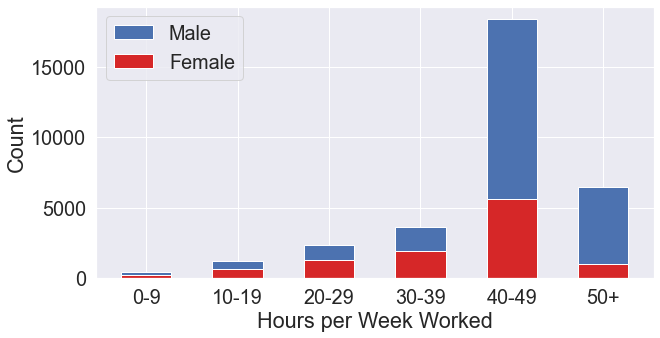

In [20]:
#Assigns the frequency values
malecount   = contingency_table.iloc[0][0:6].values
femalecount = contingency_table.iloc[1][0:6].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)

categories = ["0-9","10-19","20-29","30-39","40-49","50+"]

p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)

plt.legend((p2[0], p1[0]), ('Male', 'Female'))

plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')

- If there is truly no relationship between sex and the number of hours per week worked, then the data would show an __even ratio split__ between 'Male' and 'Female' for each time category. 

- For example, if 5% of the females worked 50+ hours, we would expect the same percentage for males who worked 50+ hours.

#### Method 1 : Chi-Squared Test for Independence - Calculation with Numpy

- In order to determine whether we accept or reject the null hypothesis, we have to compute p-value

- For testing with two categorical variables, we will use the Chi-squared test.

$$ X^2 = \frac{(observed−expected)^2}{expected}$$

- Where $X^2$ is the test statistic, 
- __observed__ are values we have in the contingency table, 
- __expected__ are values we would expect assuming the null hypothesis is true

In [15]:
f_obs = np.append(contingency_table.iloc[0][0:6].values, contingency_table.iloc[1][0:6].values)
f_obs

array([  235,   671,  1287,  1914,  5636,  1028,   223,   575,  1105,
        1753, 12700,  5434], dtype=int64)

In [16]:
row_sums = contingency_table.iloc[0:2,6].values
row_sums

array([10771, 21790], dtype=int64)

In [17]:
col_sums = contingency_table.iloc[2,0:6].values
col_sums

array([ 6462,  1246, 18336,  3667,   458,  2392], dtype=int64)

In [19]:
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
        
f_expected

[2137.5941156598383,
 412.1699579251252,
 6065.44811277295,
 1213.0234636528362,
 151.50388501581648,
 791.2604649734345,
 4324.405884340162,
 833.8300420748749,
 12270.551887227051,
 2453.976536347164,
 306.4961149841835,
 1600.7395350265656]

In [21]:
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()

print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

Chi-squared Statistic: 729291.9658823247


#### Degrees of Freedom
- calculate the degrees of freedom before we can determine the p-value.

- DoF = (Number of rows−1)∗(Number of columns−1)

In [22]:
dof = (len(row_sums)-1)*(len(col_sums)-1)

print("Degrees of Freedom: {}".format(dof))


Degrees of Freedom: 5


#### Upper-tail critical values of chi-square distribution with ν degrees of freedom

https://www.medcalc.org/manual/chi-square-table.php

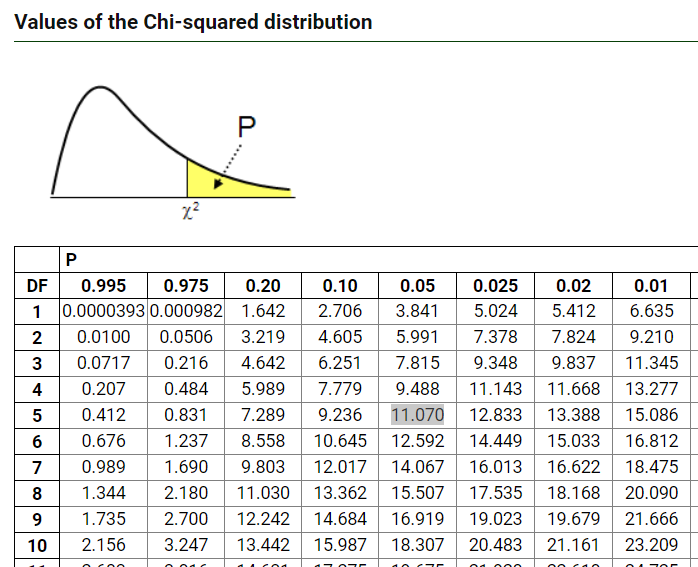

- The cut off for a alpha of 0.05, is 11.070. 
- Our X2 statistic is larger than 11.070.
- Hence we have evidence against the null hypothesis.
- meaning gender type affects working hours

#### Method 2 - The Chi-Squared Test for Independence - Using Scipy

In [17]:
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [18]:
f_obs = np.array([contingency_table.iloc[0][0:6].values,
                  contingency_table.iloc[1][0:6].values])
f_obs

array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]], dtype=int64)

In [19]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(2287.190943926107, 0.0, 5)

- The results were exactly the same as our calculations with Numpy. 
- The X2 = ~2287, p-value = ~0 and degrees of freedom = 5.

#### Conclusions
- With a p-value < 0.05 , we can reject the null hypothesis. 
- There is definitely some sort of relationship between 'sex' and the 'hours-per-week' column. 
- We don't know what this relationship is, but we do know that these two variables are not independent of each other.

#### Ex 3 - loan data

In [4]:
location = r'D:\AI-DATASETS\01-MISC\loan_data_set.csv'

In [5]:
loan = pd.read_csv(location)

#Dropping the uninformative feature
loan.drop(['Loan_ID'], axis=1, inplace=True)

loan.shape

(614, 12)

In [6]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [74]:
# loan.isnull().sum()

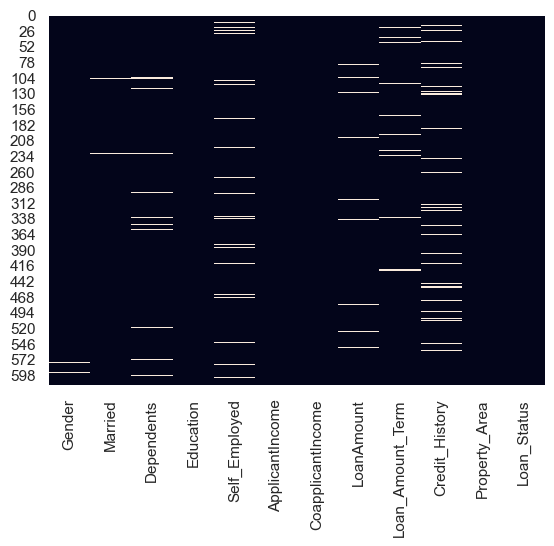

In [7]:
sns.heatmap(loan.isnull(), cbar=False);

In [8]:
loan.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
#Dropping all the null value
loan.dropna(inplace = True)

In [10]:
#Transform the numerical feature into categorical feature (for chi2 test)
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].astype('object')
loan['Credit_History']   = loan['Credit_History'].astype('object')

In [11]:
#Getting all the categorical columns except the target
categorical_columns = loan.select_dtypes(exclude = 'number').drop('Loan_Status', axis = 1).columns

In [12]:
categorical_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [13]:
pd.crosstab(loan['Gender'], loan['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,32,54
Male,116,278


In [14]:
# Import the function
from scipy.stats import chi2_contingency

In [15]:
# Testing the relationship
chi_res = chi2_contingency(pd.crosstab(loan['Loan_Status'], loan['Gender']))

In [16]:
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 1.6495637942018446, p-value: 0.19901831142812107


#### test with all the categorical features present

In [17]:
chi2_check = []

for i in categorical_columns:
    
    if chi2_contingency(pd.crosstab(loan['Loan_Status'], loan[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis; KEEP')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis; DROP')
        
res = pd.DataFrame({'column': categorical_columns, 'Test result': chi2_check})

res

,column,Test result
0,Gender,Fail to Reject Null Hypothesis; DROP
1,Married,Reject Null Hypothesis; KEEP
2,Dependents,Fail to Reject Null Hypothesis; DROP
3,Education,Fail to Reject Null Hypothesis; DROP
4,Self_Employed,Fail to Reject Null Hypothesis; DROP
5,Loan_Amount_Term,Reject Null Hypothesis; KEEP
6,Credit_History,Reject Null Hypothesis; KEEP
7,Property_Area,Reject Null Hypothesis; KEEP


In [87]:
pd.crosstab(loan['Loan_Status'], loan['Loan_Amount_Term'])

Loan_Amount_Term,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
Loan_Status,,,,,,,,,
N,2,0,1,0,12,1,5,119,8
Y,0,2,2,3,24,1,4,292,4


#### Machine learning on loan data

In [154]:
location = r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\loan_data_set.csv'

In [155]:
loan = pd.read_csv(location)

#Dropping the uninformative feature
loan.drop(['Loan_ID'], axis=1, inplace=True)

loan.shape

(614, 12)

In [156]:
#Dropping all the null value
loan.dropna(inplace = True)

In [157]:
loan.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [187]:
loan.Loan_Status.value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [188]:
X = loan.drop(['Loan_Status'], axis=1)
y = loan.Loan_Status

In [189]:
y = y.apply(lambda x:0 if x=='N' else 1)

In [190]:
X_dummied = pd.get_dummies(X, drop_first=True)

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_dummied, y, test_size = 0.30, random_state = 101)

In [193]:
#Creating the prediction model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
#Performance Check
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc, accuracy_score

In [195]:
predictions = model.predict(X_test)
acc=accuracy_score(y_test, predictions)
acc

0.7708333333333334

In [197]:
#Creating the ROC-AUC plot
preds = model.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
roc_auc

# plt.figure(figsize=(7, 5))
# plt.title('Receiver Operator Characteristic')

# plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
# plt.plot([0,1], [0,1], 'r--')

# plt.legend(loc = 'lower right')
# plt.xlim([0,1])
# plt.ylim([0,1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate');

0.6988636363636364

model performance if we use all the data


#### compare it with the data we r selecting via the Chi-Square Test of Independence.

In [198]:
res

,column,Test result
0,Gender,Fail to Reject Null Hypothesis; DROP
1,Married,Reject Null Hypothesis; KEEP
2,Dependents,Fail to Reject Null Hypothesis; DROP
3,Education,Fail to Reject Null Hypothesis; DROP
4,Self_Employed,Fail to Reject Null Hypothesis; DROP
5,Loan_Amount_Term,Reject Null Hypothesis; KEEP
6,Credit_History,Reject Null Hypothesis; KEEP
7,Property_Area,Reject Null Hypothesis; KEEP


In [199]:
X_drop = X.drop(['Gender', 'Dependents', 'Education', 'Self_Employed' ], axis=1)

In [200]:
X_drop_dummied = pd.get_dummies(X_drop, drop_first=True)

In [201]:
X_drop_train, X_drop_test, y_drop_train, y_drop_test = train_test_split(X_drop_dummied, y, test_size = 0.30, random_state = 101)

In [202]:
model_drop = LogisticRegression(solver='lbfgs', max_iter = 1000)
model_drop.fit(X_drop_train, y_drop_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
predictions_drop = model_drop.predict(X_drop_test)
acc_drop = accuracy_score(y_drop_test, predictions_drop)
acc_drop

0.7916666666666666

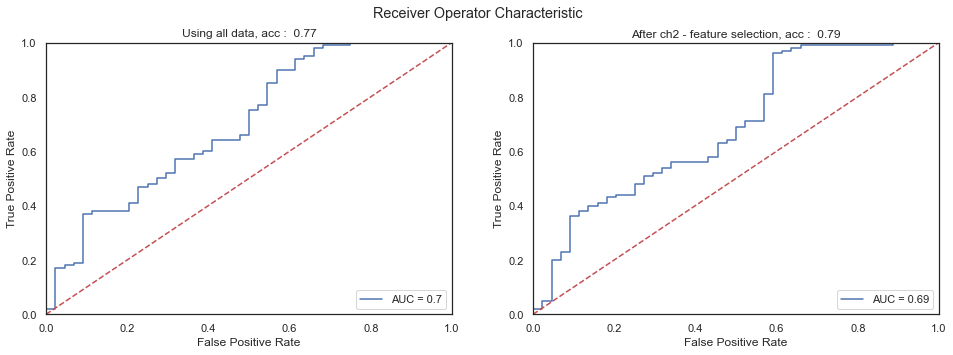

In [207]:
#Creating the ROC-AUC plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
fig.suptitle('Receiver Operator Characteristic')

preds = model.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

ax1.set_title('Using all data, acc : {:5.2f}'.format(acc))

ax1.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
ax1.plot([0,1], [0,1], 'r--')

ax1.legend(loc = 'lower right')
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')

preds_drop = model_drop.predict_proba(X_drop_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_drop_test, preds_drop)
roc_auc = auc(fpr, tpr)

ax2.set_title('After ch2 - feature selection, acc : {:5.2f}'.format(acc_drop))

ax2.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
ax2.plot([0,1], [0,1], 'r--')

ax2.legend(loc = 'lower right')
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])
ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('False Positive Rate');